In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r'D:\2021\SampleSuperstore.csv')
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
#titanic.Family_size.value_counts()
data.Country.value_counts()

United States    9994
Name: Country, dtype: int64

In [9]:
data.City.value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Santa Maria        1
Margate            1
Orland Park        1
Iowa City          1
Billings           1
Name: City, Length: 531, dtype: int64

In [10]:
data["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [11]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [13]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [14]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [15]:
duplicate_df = data[data.duplicated(keep = False)]
duplicate_df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [16]:
check_df=duplicate_df[(duplicate_df["Segment"]=="Corporate") & (duplicate_df["Country"]== "United States")]
check_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
3412,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
5372,Standard Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Paper,15.552,3,0.2,5.4432
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7735,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
7759,Standard Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Paper,15.552,3,0.2,5.4432
8457,Second Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,3.564,3,0.8,-6.2370
9477,Second Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,3.564,3,0.8,-6.2370


In [17]:
data_2=data.copy()

In [18]:
data_3=data_2.drop_duplicates(keep="first")
data_3

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [19]:
dup_check =data_3[data_3.duplicated(keep= False)]
dup_check

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [20]:
data_3.shape

(9977, 13)

In [21]:
data_3.describe().round(2)

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.00,9977.00,9977.00,9977.00,9977.00
mean,55154.96,230.15,3.79,0.16,28.69
std,32058.27,623.72,2.23,0.21,234.46
min,1040.00,0.44,1.00,0.00,-6599.98
25%,23223.00,17.30,2.00,0.00,1.73
50%,55901.00,54.82,3.00,0.20,8.67
75%,90008.00,209.97,5.00,0.20,29.37
max,99301.00,22638.48,14.00,0.80,8399.98


In [22]:
#why profit is neg ,why discount 0

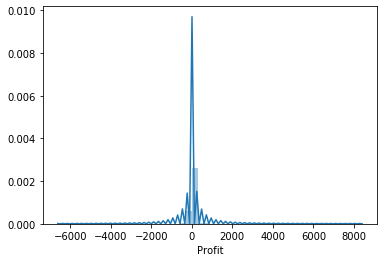

In [23]:
sns.distplot(data["Profit"])

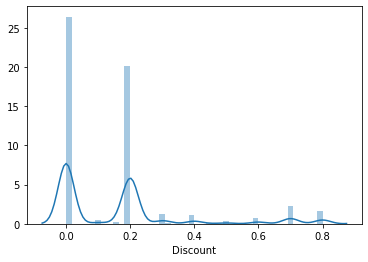

In [24]:
sns.distplot(data["Discount"])

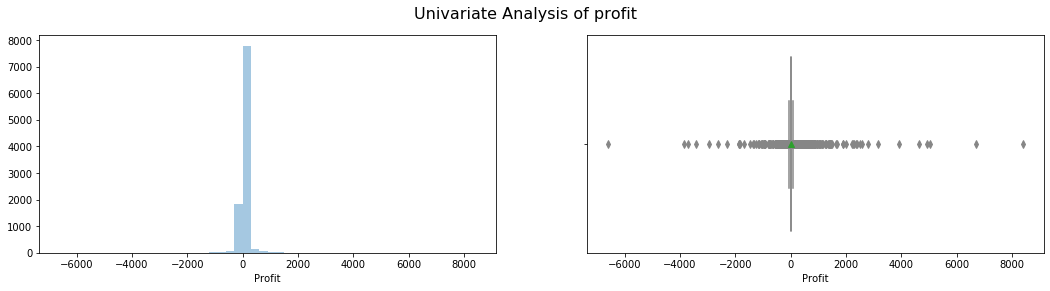

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18,4))
sns.distplot(data_3["Profit"], ax=axes[0], kde = False)
sns.boxplot(data_3["Profit"], ax=axes[1], orient = "h", showmeans = True, color = "pink")
fig.suptitle('Univariate Analysis of profit', fontsize=16)
plt.show()


In [26]:
neg_zone=data_3[data_3["Profit"]<=0]
neg_zone

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772
9962,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704


In [27]:
zero_zone=data_3[data_3["Profit"]== 0]
zero_zone

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
234,Standard Class,Home Office,United States,Tampa,Florida,33614,South,Furniture,Furnishings,258.072,3,0.2,0.0
551,Second Class,Consumer,United States,San Francisco,California,94110,West,Furniture,Chairs,1121.568,2,0.2,0.0
563,First Class,Consumer,United States,Seattle,Washington,98105,West,Office Supplies,Fasteners,3.960,2,0.0,0.0
569,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Furniture,Chairs,451.152,3,0.2,0.0
819,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,1228.465,5,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412,First Class,Consumer,United States,Los Angeles,California,90036,West,Furniture,Chairs,2803.920,5,0.2,0.0
9641,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Storage,204.900,5,0.0,0.0
9886,Standard Class,Consumer,United States,Lafayette,Indiana,47905,Central,Office Supplies,Fasteners,5.940,3,0.0,0.0
9898,Standard Class,Consumer,United States,Fairfield,Ohio,45014,East,Furniture,Furnishings,82.640,2,0.2,0.0


In [28]:
neg_perc = len(neg_zone)*100/len(data_3)    # Percentage formula
print ("% of data having negative profit: {} %".format(round(neg_perc, 3)))   # print 


% of data having negative profit: 19.385 %


In [29]:
zero_perc = len(zero_zone)*100/len(data_3)    # Percentage formula
print ("% of data having zero profit: {} %".format(round(neg_perc, 3)))   # print 


% of data having zero profit: 19.385 %


In [30]:
data_4=data_3[data_3["Profit"]>0]  #greater than 0 profit

In [31]:
data_4.shape

(8043, 13)

In [32]:
data_5=data_4[data_4["Discount"]>0] # greater than zero discount

In [33]:
data_5.shape

(3286, 13)

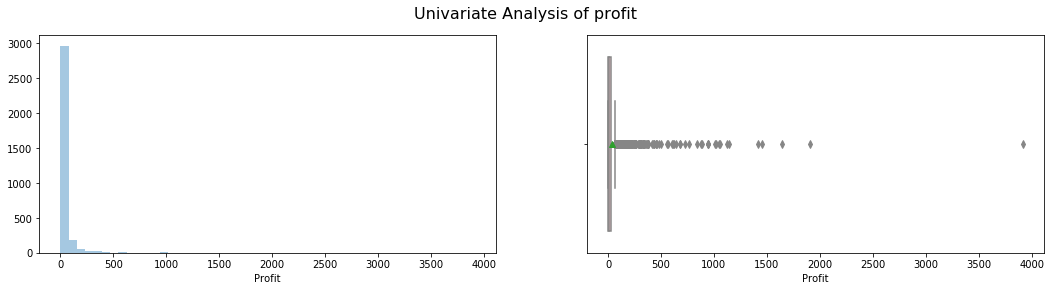

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18,4))
sns.distplot(data_5["Profit"], ax=axes[0], kde = False)
sns.boxplot(data_5["Profit"], ax=axes[1], orient = "h", showmeans = True, color = "pink")
fig.suptitle('Univariate Analysis of profit', fontsize=16)
plt.show()


In [35]:
data_profit_zero=data_5[data_5["Discount"]==0]
data_profit_zero

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [36]:
data_5.Country.value_counts()

United States    3286
Name: Country, dtype: int64

In [38]:
#data_5.City.value_counts()
#data_5["Ship Mode"].value_counts()
#data_5["Segment"].value_counts()
#data_5["Region"].value_counts()
#data_5["Category"].value_counts()
#data_5["Sub-Category"].value_counts()

In [40]:
data_5.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

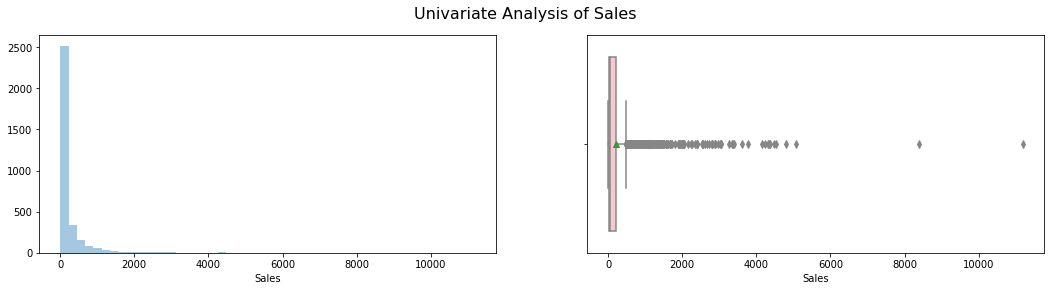

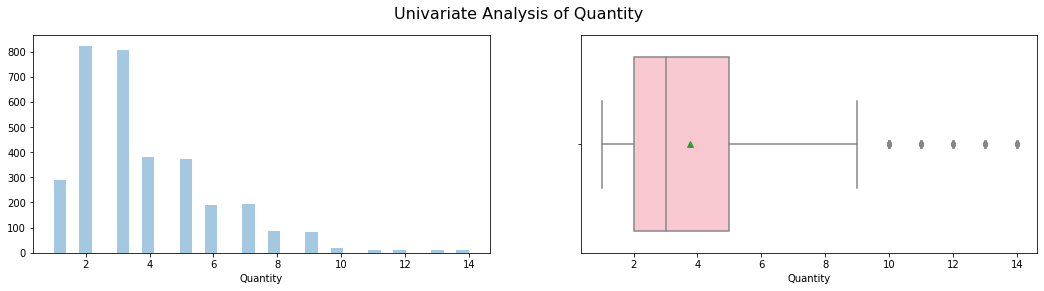

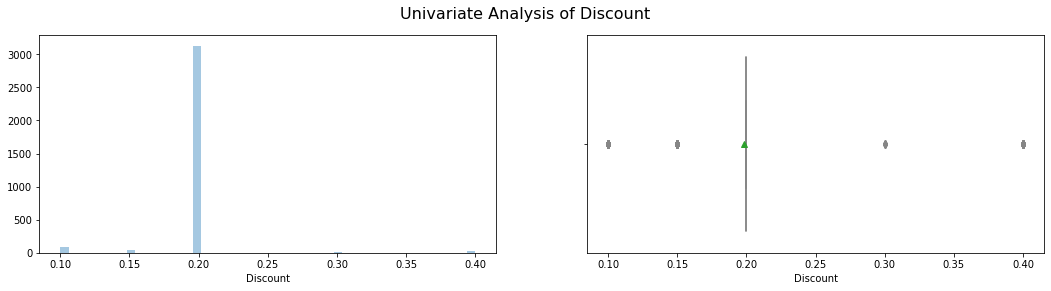

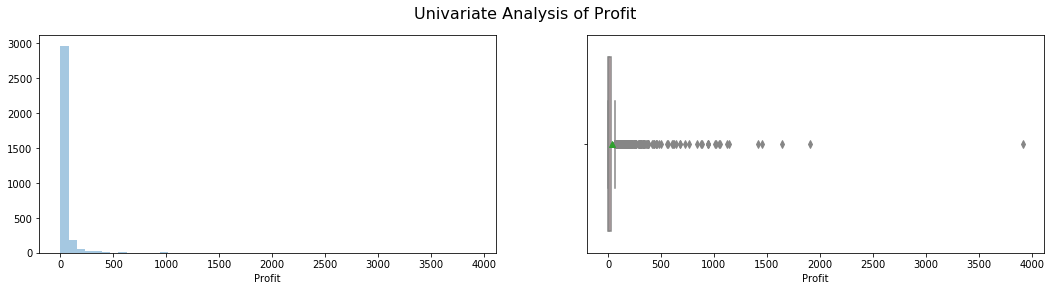

In [44]:
#x_axis = data_5.columns.tolist() #Discount List
x_axis=
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data_5[x], ax=axes[0], kde = False)
    sns.boxplot(data_5[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)
data_5[['Sales','Quantity','Discount','Profit']]

In [48]:
def scatter_regplot(x, y, in_data): 
    '''
    Returns Scatter plot with regression trend line
    '''
    
    sns.regplot(x=x, y=y, data=in_data) 
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()


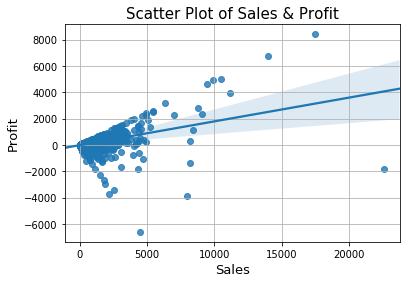

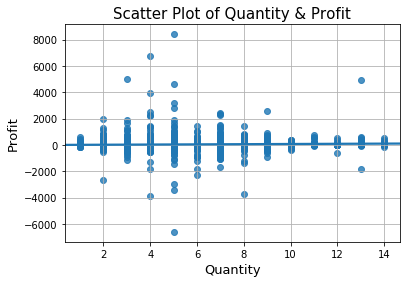

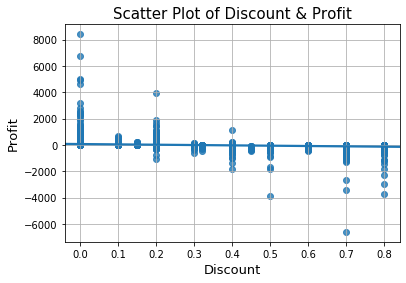

In [49]:
scatter_data=data_5[['Sales','Quantity','Discount']]
#scatter_data.columns.tolist()
x_axis = scatter_data.columns.tolist()
y_axis = "Profit"

for col in x_axis:
    scatter_regplot(x = col, y = y_axis, in_data = data)
